<a href="https://colab.research.google.com/github/hargurjeet/Suprise_Housing/blob/main/Suprise_Housing_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suprise House Pricing Case Study**

The case study provide a detailed analysis of housing prices within Australia and how Suprise Housing company leverage this information to buy houses at low prices and sell them at high prices

  # **Table Of Contents**<a name="top"></a>


---



---

  
  1. [About the Dataset](#1)
  2. [Data Understanding](#2)
  3. [Expainatory Data Analysis](#3)
  4. [Data Prepartion](#4)
  5. [Model Building](#5)
  6. [Evaluation on Test set](#6)
  7. [Summary & Conclusion](#7)
  8. [References](#8)

# 4: Data Prepartion <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 5: Model Building <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 6: Evaluations <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 7: Summary & Conclusion <a name="7"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 8: Reference <a name="8"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 1: AboutDataset <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

The dataset contains around 1500 records covering various details of house prices along with it sales/house pricing information.

In [55]:
## Data preprocessing libraries
import pandas as pd
import numpy as np
from numpy import arange

## Libraries for building visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Libraries for building ML models
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Libraries for Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Libraries for hyperparameter tuning
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# Libraries to supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [56]:
input_url = 'https://raw.githubusercontent.com/hargurjeet/Suprise_Housing/main/train.csv'
raw_data = pd.read_csv(input_url)
raw_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# 2: Data Understanding <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [57]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Key observation** - 
- No nul values within the dataset. Few columns seems to have extermely high number of null values.
- High number of both Categorical and numberica columns.

# 3: Explainatory Data Analysis <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [58]:
# Identifying and removing columns having missing values over 40%
pd.set_option('display.max_rows', None)
columns_with_high_missing_values = raw_data.columns[[((raw_data.isnull().sum()/len(raw_data))*100 > 40)]]
columns_with_high_missing_values

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [59]:
print('Total number of columns within the dataset', len(raw_data.columns))
raw_data = raw_data.drop(labels=columns_with_high_missing_values, axis=1)

# Id colums seems to be irrelevant as well
raw_data = raw_data.drop(labels='Id', axis=1)
print('Total number of columns left after dropping the columns', len(raw_data.columns))

Total number of columns within the dataset 81
Total number of columns left after dropping the columns 75


In [60]:
# As total number of columns are pretty high
# let us identify the numberical and categorical columns
raw_data_numberic = raw_data.select_dtypes(include=['number'])
raw_data_cat = raw_data.select_dtypes(include=['object'])
print('Total numberic columns', len(raw_data_numberic.columns))
print('Total categorical columns', len(raw_data_cat.columns))

Total numberic columns 37
Total categorical columns 38


In [61]:
# Analysing Numberical columns
raw_data_numberic.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

## Univarite Analysis

### Univarite analysis Quantitavie **variables**

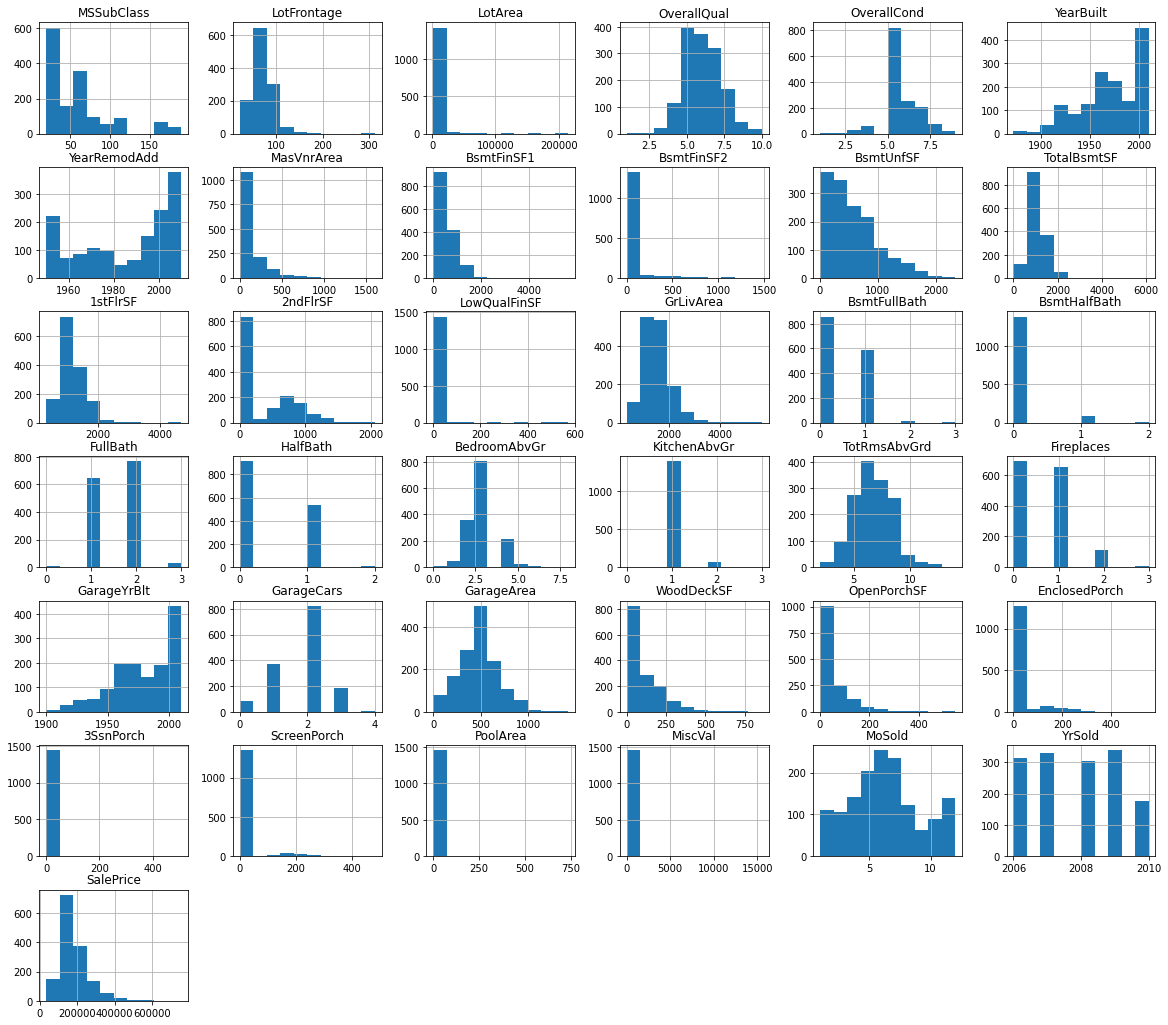

In [62]:
raw_data_numberic.hist(figsize=(20,18))
plt.show()

** - Key obervations **
- For few columns most of the values seems zero. They are  'BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal'. As these columns doesnt contain much info I plan to drop these columns

- Few columns can be categorised as catergory columns as they done contain continous values they are - 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'KitchenAbvGr','Fireplaces', 'GarageCars','YrSold'

In [63]:
# adding colums to categorical data
cat_cols =['BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'KitchenAbvGr','Fireplaces', 'GarageCars','YrSold']
raw_data_cat = pd.concat([raw_data_cat,raw_data_numberic[cat_cols]], axis=1 )

# Implementing the above observations
drop_cols =['BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal']
raw_data_numberic.drop(columns = drop_cols + cat_cols, inplace=True)

In [64]:
print('Total numberic columns', len(raw_data_numberic.columns))
print('Total categorical columns', len(raw_data_cat.columns))

Total numberic columns 22
Total categorical columns 46


In [65]:
raw_data_numberic.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'SalePrice'],
      dtype='object')

### Univarite analysis Categorical variables

In [66]:
raw_data_cat.shape

(1460, 46)

In [67]:
raw_data_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'YrSold'],
      dtype='object')

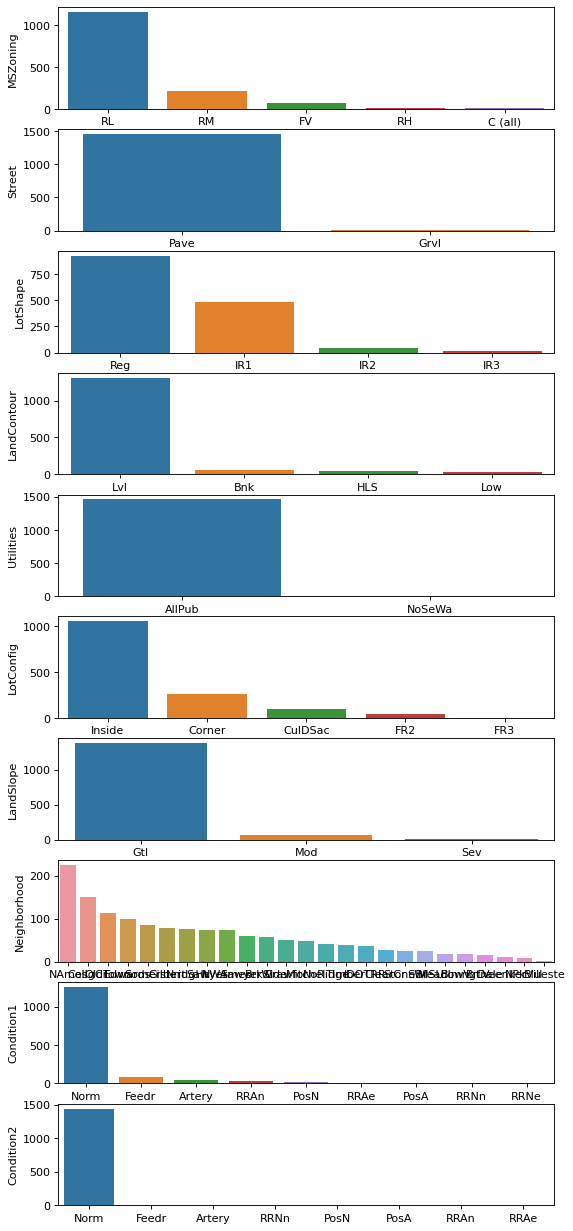

In [68]:
figure(figsize=(8, 40), dpi=80)
# plt.figure(bbox_inches='tight',dpi=100)

# fig, axs = plt.subplots(2, 2) 
plt.subplot(20, 1, 1)
sns.barplot(x = raw_data_cat.MSZoning.value_counts().index, y = raw_data_cat.MSZoning.value_counts())

plt.subplot(20, 1, 2)
sns.barplot(x = raw_data_cat.Street.value_counts().index, y = raw_data_cat.Street.value_counts())

plt.subplot(20, 1, 3)
sns.barplot(x = raw_data_cat.LotShape.value_counts().index, y = raw_data_cat.LotShape.value_counts())

plt.subplot(20, 1, 4)
sns.barplot(x = raw_data_cat.LandContour.value_counts().index, y = raw_data_cat.LandContour.value_counts())

plt.subplot(20, 1, 5)
sns.barplot(x = raw_data_cat.Utilities.value_counts().index, y = raw_data_cat.Utilities.value_counts())

plt.subplot(20, 1, 6)
sns.barplot(x = raw_data_cat.LotConfig.value_counts().index, y = raw_data_cat.LotConfig.value_counts())

plt.subplot(20, 1, 7)
sns.barplot(x = raw_data_cat.LandSlope.value_counts().index, y = raw_data_cat.LandSlope.value_counts())

plt.subplot(20, 1, 8)
sns.barplot(x = raw_data_cat.Neighborhood.value_counts().index, y = raw_data_cat.Neighborhood.value_counts())

plt.subplot(20, 1, 9)
sns.barplot(x = raw_data_cat.Condition1.value_counts().index, y = raw_data_cat.Condition1.value_counts())

plt.subplot(20, 1, 10)
sns.barplot(x = raw_data_cat.Condition2.value_counts().index, y = raw_data_cat.Condition2.value_counts())
plt.show()



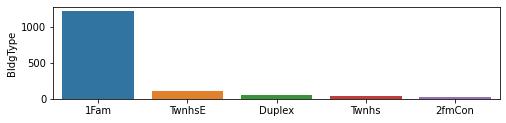

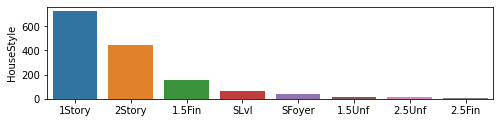

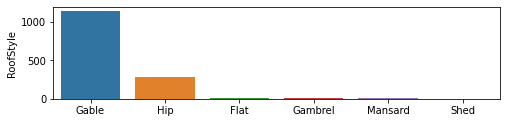

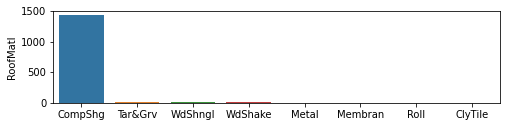

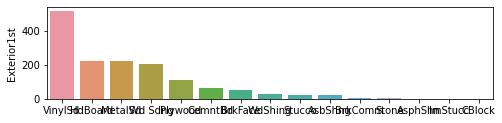

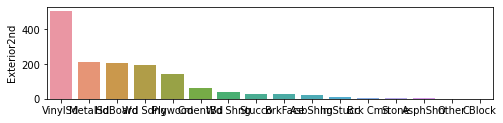

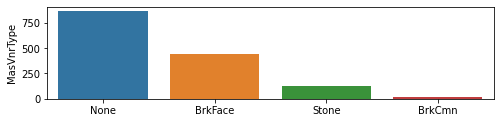

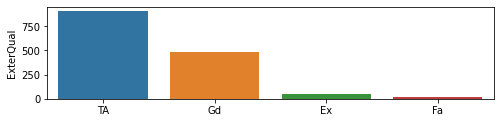

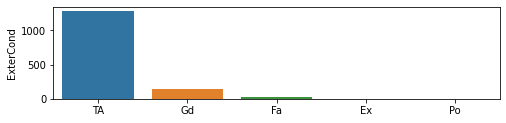

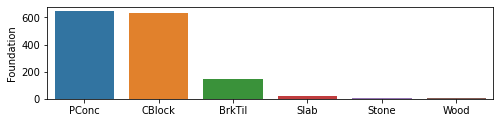

In [69]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.BldgType.value_counts().index, y = raw_data_cat.BldgType.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.HouseStyle.value_counts().index, y = raw_data_cat.HouseStyle.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.RoofStyle.value_counts().index, y = raw_data_cat.RoofStyle.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.RoofMatl.value_counts().index, y = raw_data_cat.RoofMatl.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.Exterior1st.value_counts().index, y = raw_data_cat.Exterior1st.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.Exterior2nd.value_counts().index, y = raw_data_cat.Exterior2nd.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.MasVnrType.value_counts().index, y = raw_data_cat.MasVnrType.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.ExterQual.value_counts().index, y = raw_data_cat.ExterQual.value_counts())
plt.show()

plt.subplot(10, 1, 9)
sns.barplot(x = raw_data_cat.ExterCond.value_counts().index, y = raw_data_cat.ExterCond.value_counts())
plt.show()

plt.subplot(10, 1, 10)
sns.barplot(x = raw_data_cat.Foundation.value_counts().index, y = raw_data_cat.Foundation.value_counts())
plt.show()

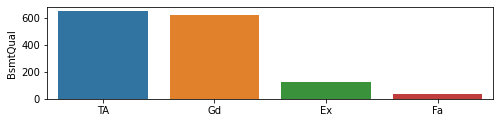

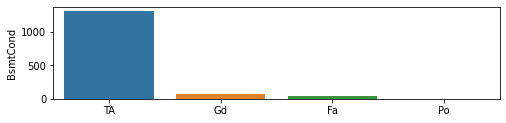

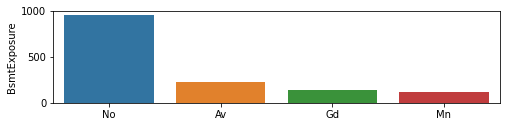

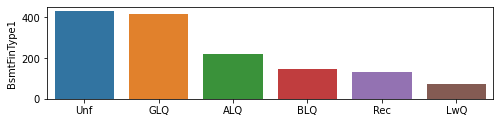

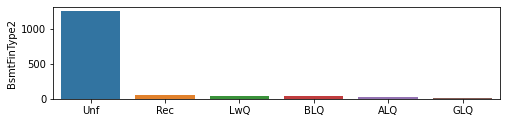

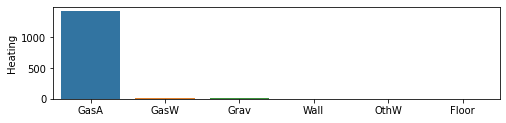

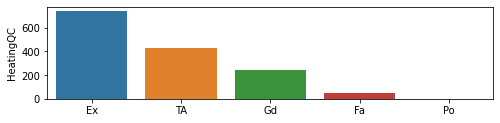

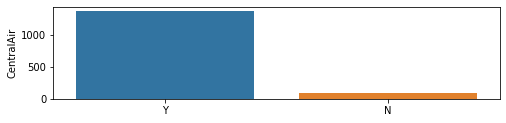

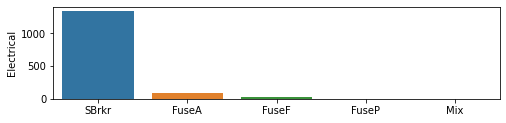

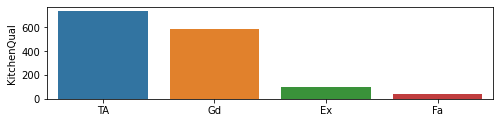

In [70]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.BsmtQual.value_counts().index, y = raw_data_cat.BsmtQual.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.BsmtCond.value_counts().index, y = raw_data_cat.BsmtCond.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.BsmtExposure.value_counts().index, y = raw_data_cat.BsmtExposure.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.BsmtFinType1.value_counts().index, y = raw_data_cat.BsmtFinType1.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.BsmtFinType2.value_counts().index, y = raw_data_cat.BsmtFinType2.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.Heating.value_counts().index, y = raw_data_cat.Heating.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.HeatingQC.value_counts().index, y = raw_data_cat.HeatingQC.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.CentralAir.value_counts().index, y = raw_data_cat.CentralAir.value_counts())
plt.show()

plt.subplot(10, 1, 9)
sns.barplot(x = raw_data_cat.Electrical.value_counts().index, y = raw_data_cat.Electrical.value_counts())
plt.show()

plt.subplot(10, 1, 10)
sns.barplot(x = raw_data_cat.KitchenQual.value_counts().index, y = raw_data_cat.KitchenQual.value_counts())
plt.show()

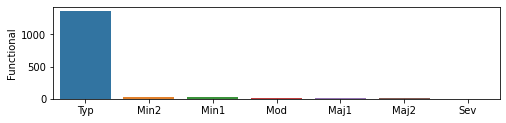

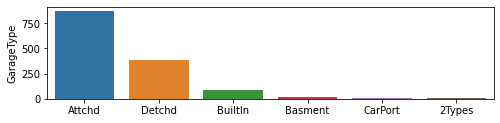

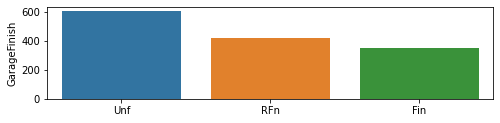

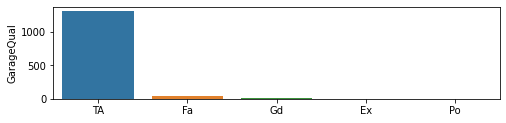

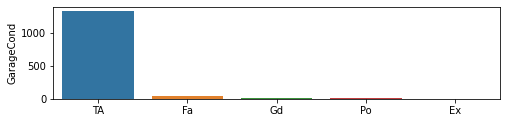

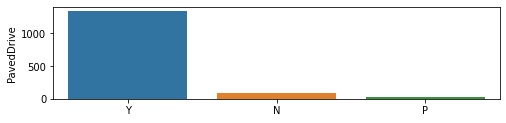

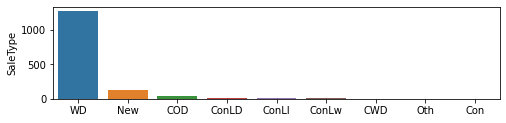

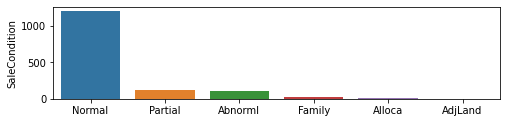

In [71]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.Functional.value_counts().index, y = raw_data_cat.Functional.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.GarageType.value_counts().index, y = raw_data_cat.GarageType.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.GarageFinish.value_counts().index, y = raw_data_cat.GarageFinish.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.GarageQual.value_counts().index, y = raw_data_cat.GarageQual.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.GarageCond.value_counts().index, y = raw_data_cat.GarageCond.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.PavedDrive.value_counts().index, y = raw_data_cat.PavedDrive.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.SaleType.value_counts().index, y = raw_data_cat.SaleType.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.SaleCondition.value_counts().index, y = raw_data_cat.SaleCondition.value_counts())
plt.show()


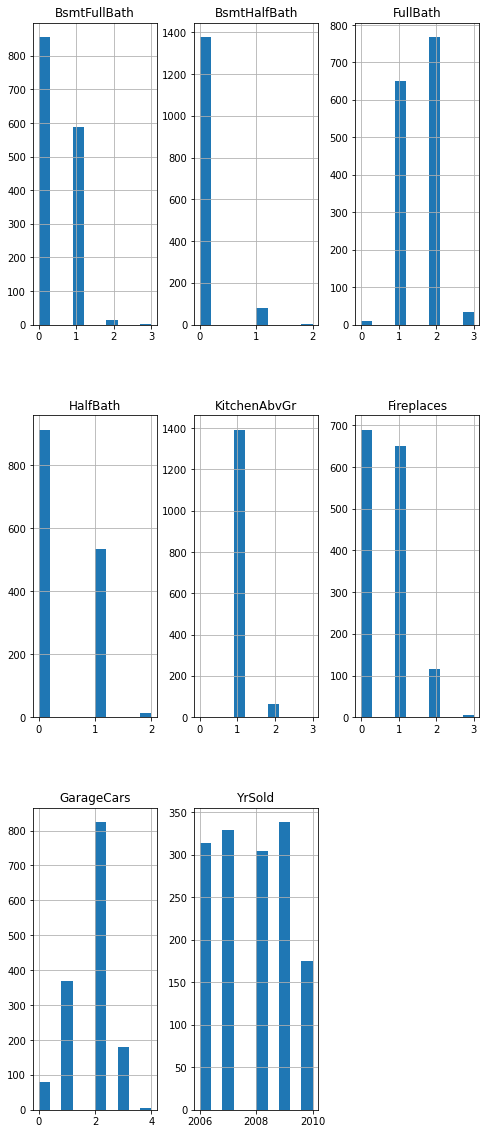

In [72]:
raw_data_cat.hist()
plt.show()

It is observed in some categorical features the distribution of the caterogry are not uniform and they are highly skewed. I am noting down those category and removing these feautres as they will make the model highly bias. The skewness is observed on the following features - 'MSZoning','Street','LandContour','Utilities', 'LandSlope', 'Condition1', 'Condition2','BldgType','RoofMatl','ExterCond','BsmtCond',
	  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition','BsmtHalfBath','KitchenAbvGr'


In [73]:
skewed_cols = ['MSZoning','Street','LandContour','Utilities', 'LandSlope', 'Condition1', 'Condition2','BldgType','RoofMatl','ExterCond','BsmtCond',\
	  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition','BsmtHalfBath','KitchenAbvGr']

raw_data_cat.drop(skewed_cols, axis =1, inplace=True)
raw_data_cat.shape

(1460, 23)

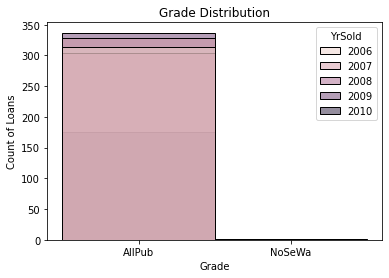

In [14]:
sns.histplot(x=raw_data_cat.Utilities, hue=raw_data_cat.YrSold)
plt.title('Grade Distribution')
plt.ylabel('Count of Loans')
plt.xlabel('Grade')
plt.show()

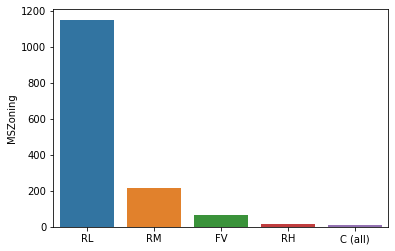

In [15]:
sns.barplot(x=raw_data_cat.MSZoning.value_counts().index, y = raw_data_cat.MSZoning.value_counts())
plt.show()

In [ ]:
raw_data_cat.hist(figsize=(20,18))
plt.show()

## Bivariate Analysis

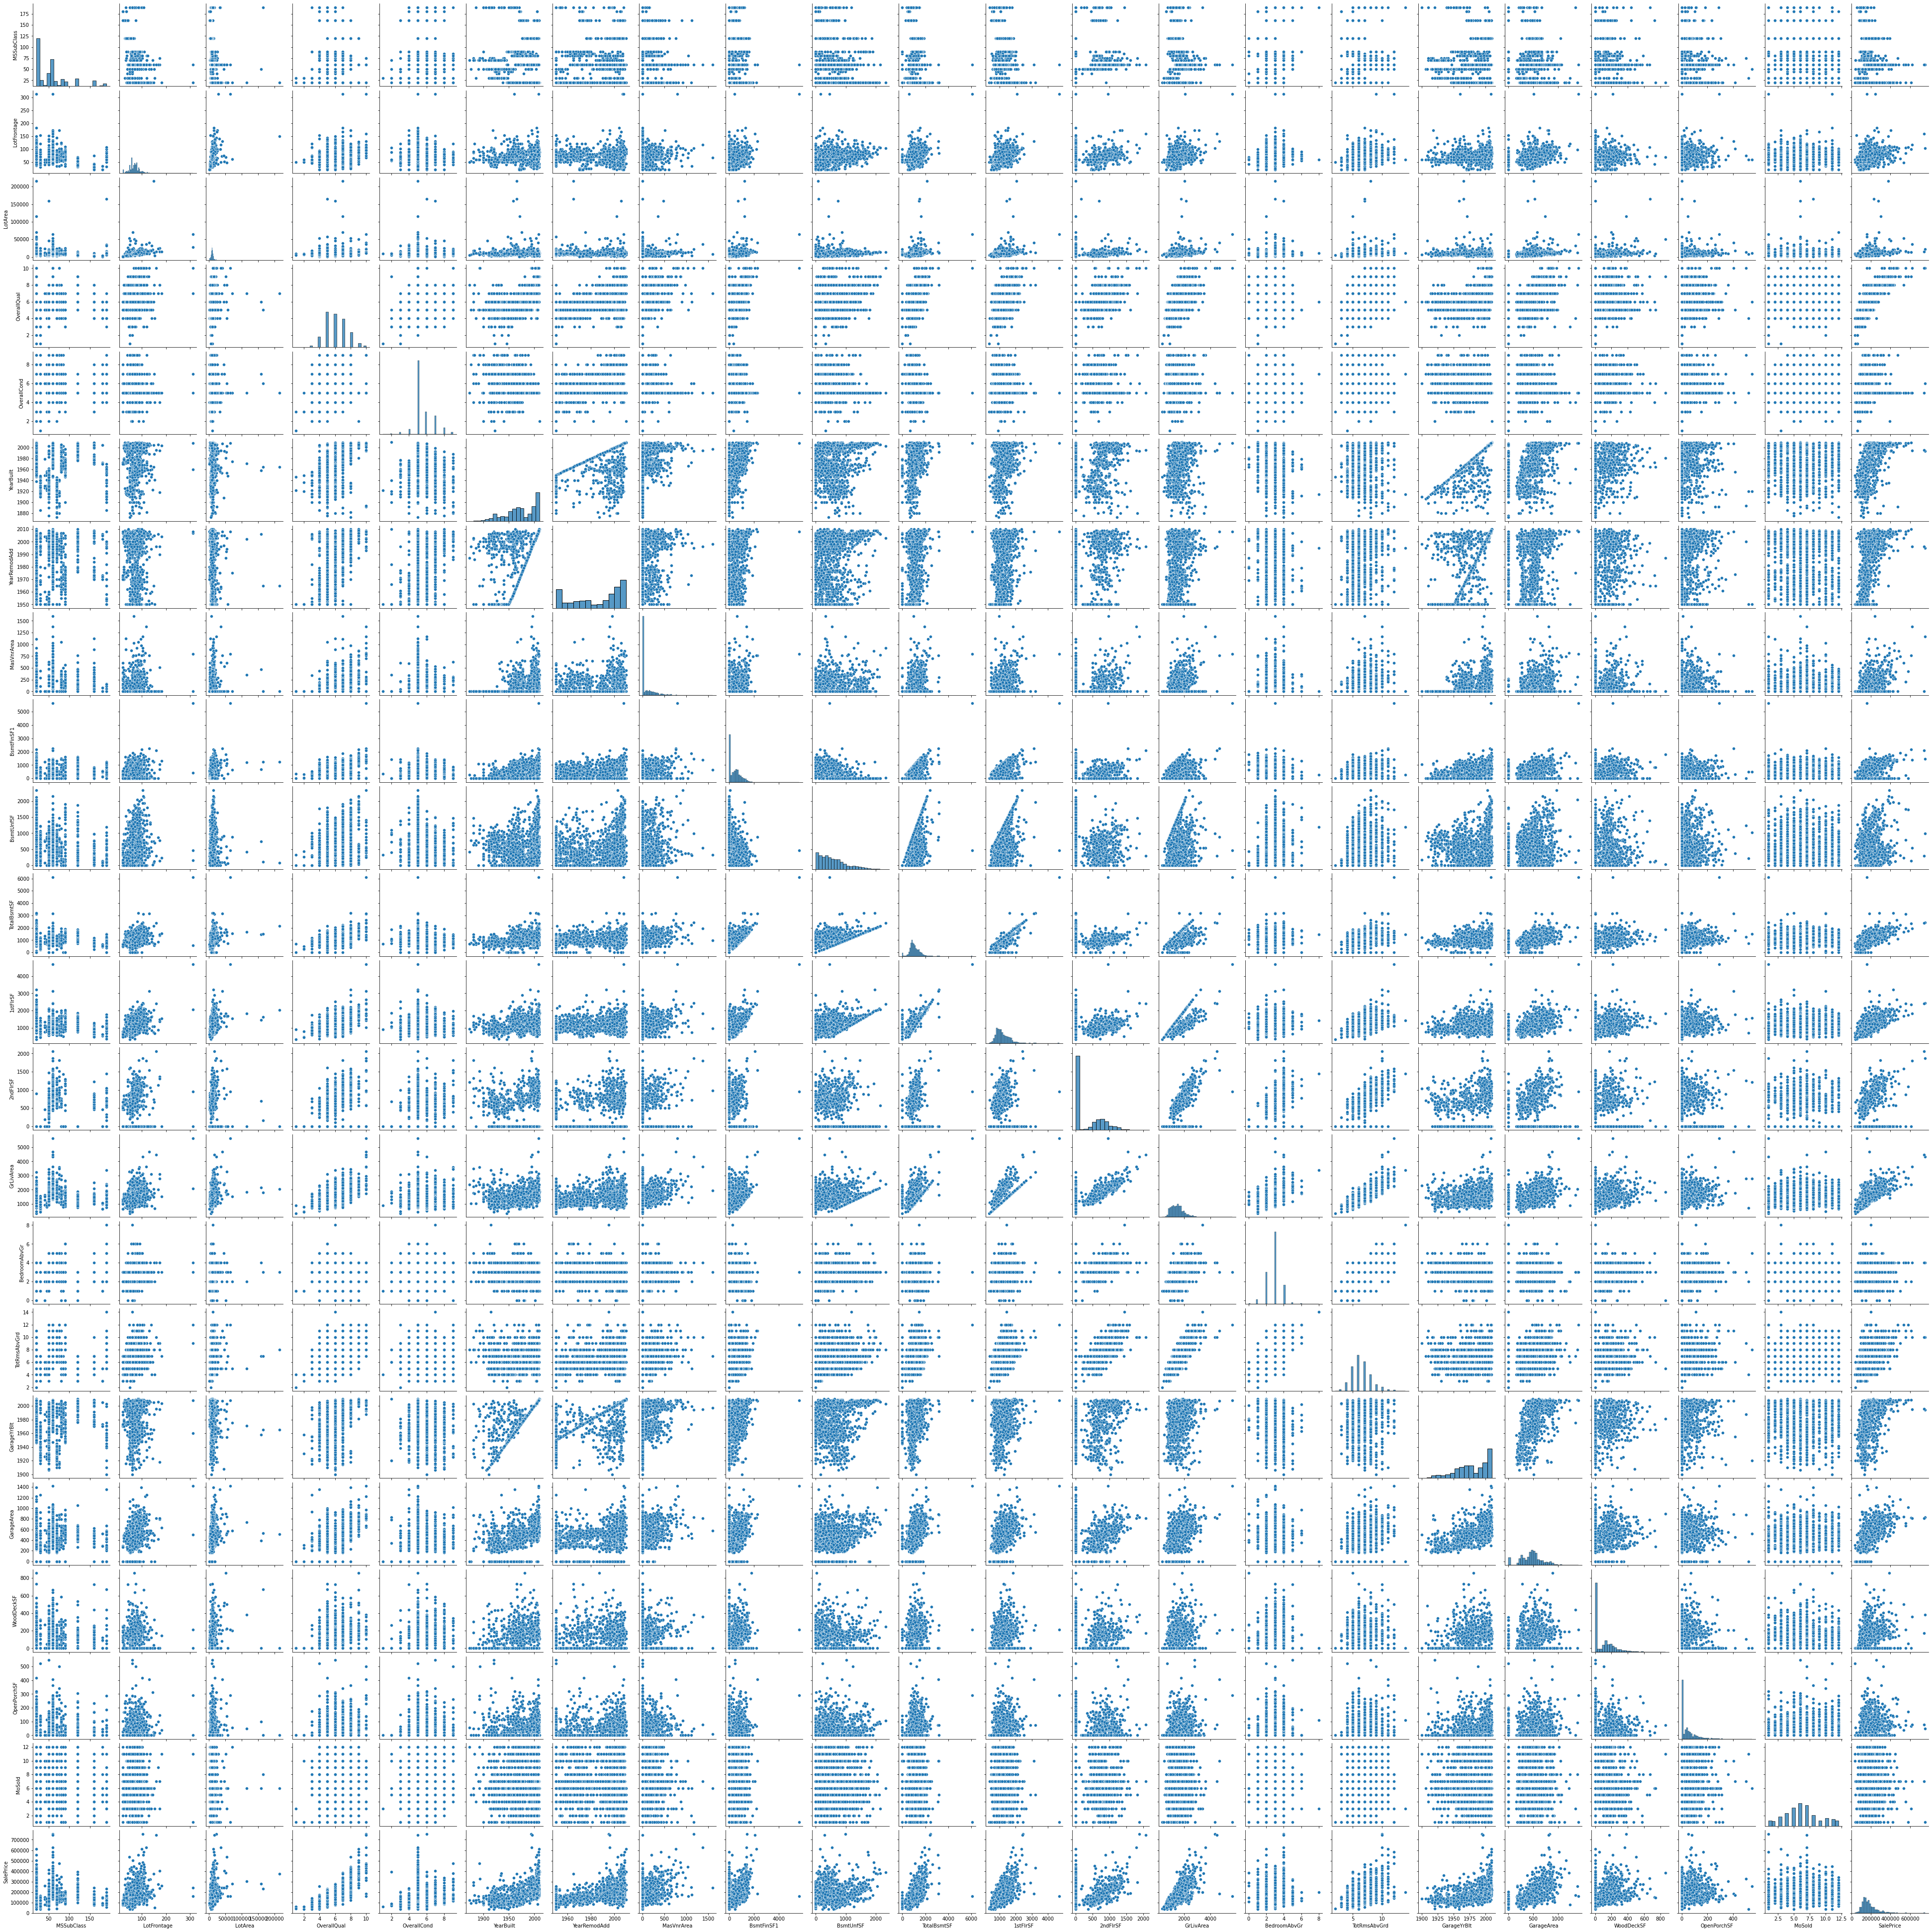

In [14]:
sns.pairplot(raw_data_numberic)
plt.show()

It is difficult to figure out something from the above diagram, Hence generating to corelation matrix

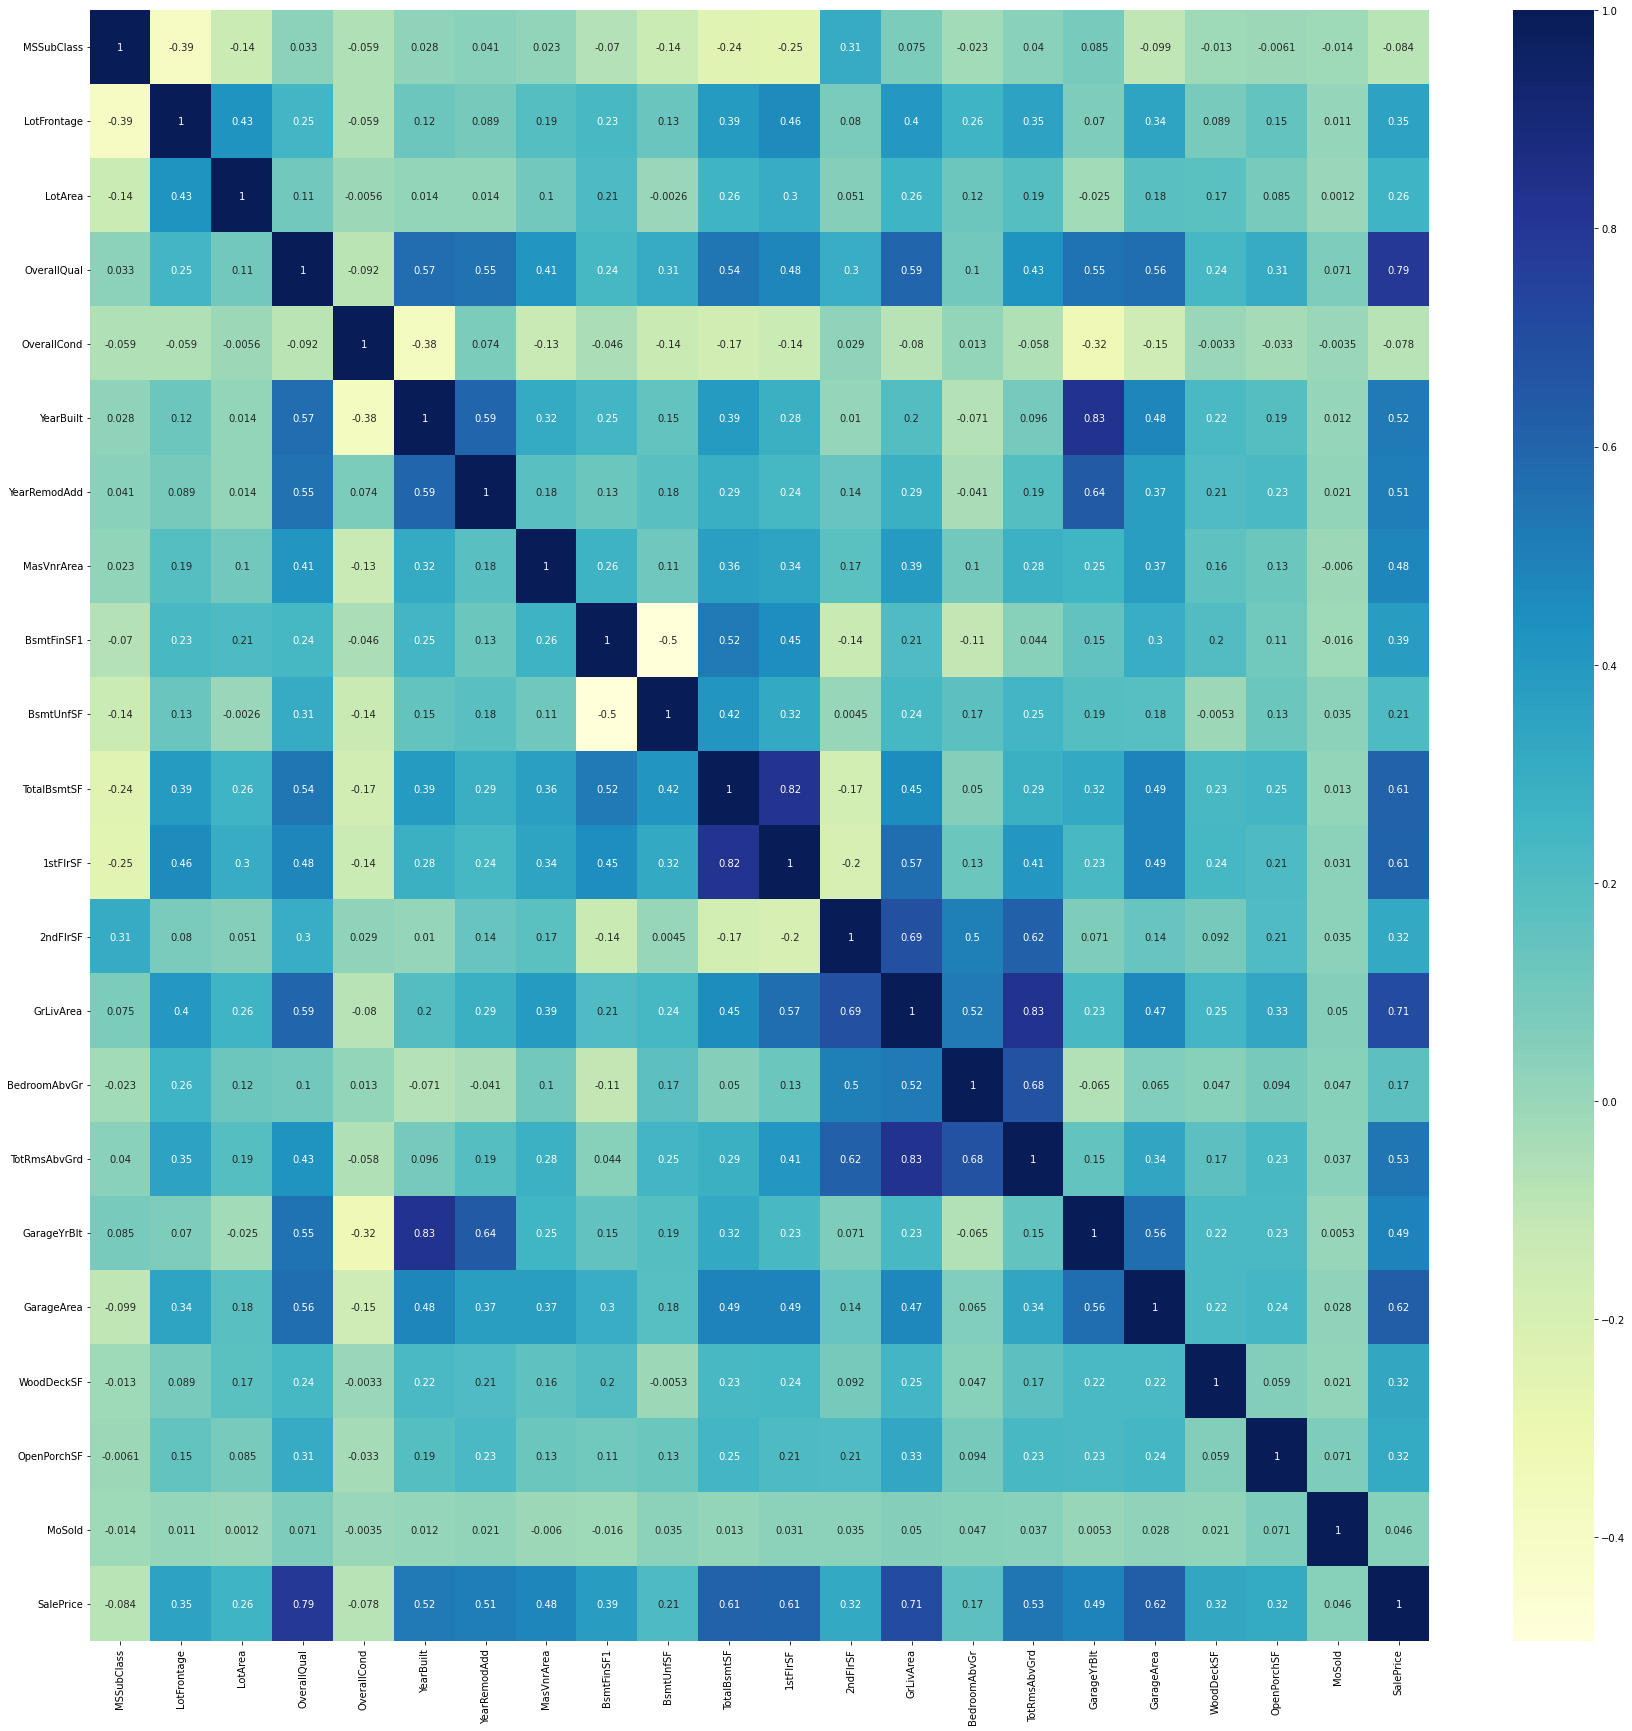

In [16]:
plt.figure(figsize = (30, 30))
sns.heatmap(raw_data_numberic.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)
plt.show()

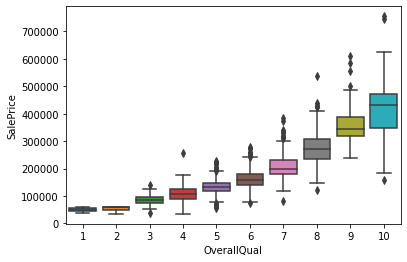

In [13]:
sns.boxplot(y=raw_data_numberic.SalePrice, x=raw_data_numberic.OverallQual, data=raw_data_numberic)

In [6]:
X = raw_data.drop('SalePrice', axis=1)
y = raw_data['SalePrice']

In [7]:
y.shape

(1460,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Imputation

In [9]:
## seprating numberical and categorical columns
X_train_numberic = X_train.select_dtypes(include=['number'])
X_train_cat = X_train.select_dtypes(include=['object'])

In [10]:
print(X_train_cat.shape, X_train_numberic.shape)

(978, 38) (978, 36)


In [11]:
pd.set_option('display.max_column', None)
X_train_numberic.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
615           85         80.0     8800            6            7       1963   
613           20         70.0     8402            5            5       2007   
1303          20         73.0     8688            7            5       2005   
486           20         79.0    10289            5            7       1965   
561           20         77.0    10010            5            5       1974   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
615           1963       156.0         763           0        173   
613           2007         0.0         206           0        914   
1303          2005       228.0           0           0       1616   
486           1965       168.0         836           0        237   
561           1975         0.0        1071         123        195   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
615           936      1054         0             0       1054             1   
613          1120      1120         0             0       1120             0   
1303         1616      1616         0             0       1616             0   
486          1073      1073         0             0       1073             1   
561          1389      1389         0             0       1389             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
615              0         1         0             3             1   
613              0         1         0             3             1   
1303             0         2         0             3             1   
486              0         1         1             3             1   
561              0         1         0             2             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
615              6           0       1963.0           2         480   
613              6           0          NaN           0           0   
1303             7           0       2005.0           3         834   
486              6           0       1965.0           2         515   
561              6           1       1975.0           2         418   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
615          120            0              0          0            0   
613            0           30              0          0            0   
1303         208           59              0          0            0   
486            0            0              0          0            0   
561          240           38              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
615          0        0       5    2010  
613          0        0      12    2007  
1303         0        0       4    2006  
486          0        0       6    2007  
561          0        0       4    2006

In [12]:
## Observing few column can be classifed as catergorical instead on numberical
cat_cols = ['YearBuilt', 'GarageYrBlt', 'YrSold']
X_train_numberic[cat_cols] = X_train_numberic[cat_cols].astype(object)
X_train_cat = pd.concat([X_train_cat.sort_index(), X_train_numberic[cat_cols].sort_index()],  axis=1)
X_train_numberic = X_train_numberic.drop(cat_cols, axis=1)
print(X_train_cat.shape, X_train_numberic.shape)

(978, 41) (978, 33)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Imputing numberical columns

In [13]:
X_train_numberic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     978 non-null    int64  
 1   LotFrontage    795 non-null    float64
 2   LotArea        978 non-null    int64  
 3   OverallQual    978 non-null    int64  
 4   OverallCond    978 non-null    int64  
 5   YearRemodAdd   978 non-null    int64  
 6   MasVnrArea     976 non-null    float64
 7   BsmtFinSF1     978 non-null    int64  
 8   BsmtFinSF2     978 non-null    int64  
 9   BsmtUnfSF      978 non-null    int64  
 10  TotalBsmtSF    978 non-null    int64  
 11  1stFlrSF       978 non-null    int64  
 12  2ndFlrSF       978 non-null    int64  
 13  LowQualFinSF   978 non-null    int64  
 14  GrLivArea      978 non-null    int64  
 15  BsmtFullBath   978 non-null    int64  
 16  BsmtHalfBath   978 non-null    int64  
 17  FullBath       978 non-null    int64  
 18  HalfBat

In [14]:
X_train_numberic.isnull().sum()

MSSubClass         0
LotFrontage      183
LotArea            0
OverallQual        0
OverallCond        0
YearRemodAdd       0
MasVnrArea         2
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
dtype: int64

In [15]:
X_train_numberic = X_train_numberic.drop(labels=['LotFrontage','MasVnrArea'], axis=1)

In [16]:
# scaling the data between 0 and 1
scaler = MinMaxScaler()
X_train_numberic_scaled = pd.DataFrame(scaler.fit_transform(X_train_numberic), columns = X_train_numberic.columns)
X_train_numberic_scaled.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearRemodAdd  BsmtFinSF1  \
0    0.382353  0.035056     0.555556         0.75      0.216667    0.135188   
1    0.000000  0.033195     0.444444         0.50      0.950000    0.036499   
2    0.000000  0.034532     0.666667         0.50      0.916667    0.000000   
3    0.000000  0.042015     0.444444         0.75      0.250000    0.148122   
4    0.000000  0.040711     0.444444         0.50      0.416667    0.189759   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    0.000000   0.074058     0.153191  0.165213       0.0           0.0   
1    0.000000   0.391267     0.183306  0.180358       0.0           0.0   
2    0.000000   0.691781     0.264484  0.294172       0.0           0.0   
3    0.000000   0.101455     0.175614  0.169573       0.0           0.0   
4    0.109139   0.083476     0.227332  0.242084       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.135644      0.333333           0.0  0.333333       0.0         0.375   
1   0.148078      0.000000           0.0  0.333333       0.0         0.375   
2   0.241522      0.000000           0.0  0.666667       0.0         0.375   
3   0.139224      0.333333           0.0  0.333333       0.5         0.375   
4   0.198757      0.333333           0.0  0.333333       0.0         0.250   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0           0.5      0.333333    0.000000        0.50    0.338505    0.140023   
1           0.5      0.333333    0.000000        0.00    0.000000    0.000000   
2           0.5      0.416667    0.000000        0.75    0.588152    0.242707   
3           0.5      0.333333    0.000000        0.50    0.363188    0.000000   
4           0.5      0.333333    0.333333        0.50    0.294781    0.280047   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0     0.000000            0.0        0.0          0.0       0.0      0.0   
1     0.054845            0.0        0.0          0.0       0.0      0.0   
2     0.107861            0.0        0.0          0.0       0.0      0.0   
3     0.000000            0.0        0.0          0.0       0.0      0.0   
4     0.069470            0.0        0.0          0.0       0.0      0.0   

     MoSold  
0  0.363636  
1  1.000000  
2  0.272727  
3  0.454545  
4  0.272727

## Imputing categorical values

In [17]:
X_train_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition YearBuilt  \
0         TA         TA          Y       WD        Normal      2003   
1         TA         TA          Y       WD        Normal      1976   
2         TA         TA          Y       WD        Normal      2001   
3         TA         TA          Y       WD       Abnorml      1915   
4         TA         TA          Y       WD        Normal      2000   

  GarageYrBlt YrSold  
0      2003.0   2008  
1      1976.0   2007  
2      2001.0   2008  
3      1998.0   2006  
4      2000.0   2008

In [18]:
X_train_cat = X_train_cat.where(pd.notnull(X_train_cat), None)

In [19]:
imp_median = SimpleImputer(missing_values=None, strategy='most_frequent')
X_train_cat = pd.DataFrame(imp_median.fit_transform(X_train_cat), columns = X_train_cat.columns)
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       978 non-null    object
 1   Street         978 non-null    object
 2   LotShape       978 non-null    object
 3   LandContour    978 non-null    object
 4   Utilities      978 non-null    object
 5   LotConfig      978 non-null    object
 6   LandSlope      978 non-null    object
 7   Neighborhood   978 non-null    object
 8   Condition1     978 non-null    object
 9   Condition2     978 non-null    object
 10  BldgType       978 non-null    object
 11  HouseStyle     978 non-null    object
 12  RoofStyle      978 non-null    object
 13  RoofMatl       978 non-null    object
 14  Exterior1st    978 non-null    object
 15  Exterior2nd    978 non-null    object
 16  MasVnrType     978 non-null    object
 17  ExterQual      978 non-null    object
 18  ExterCond      978 non-null   

In [20]:
X_train_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition YearBuilt  \
0         TA         TA          Y       WD        Normal      2003   
1         TA         TA          Y       WD        Normal      1976   
2         TA         TA          Y       WD        Normal      2001   
3         TA         TA          Y       WD       Abnorml      1915   
4         TA         TA          Y       WD        Normal      2000   

  GarageYrBlt YrSold  
0      2003.0   2008  
1      1976.0   2007  
2      2001.0   2008  
3      1998.0   2006  
4      2000.0   2008

In [21]:
X_train_cat.shape

(978, 41)

In [22]:
## columns to be one hot encoded
dummeies_cat_cols = ['MSZoning', 'Street', 'LandContour', 'Utilities','LotConfig', 'BldgType',\
                     'HouseStyle','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating',\
                     'CentralAir','Electrical','GarageType','PavedDrive','SaleCondition']

## column to be encoded orinally
ordinal_cat_cols = ['LotShape', 'LotConfig', 'ExterQual', 'ExterCond', 'BsmtQual','BsmtCond',\
                    'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional',\
                    'GarageFinish','GarageQual','GarageCond','YearBuilt','GarageYrBlt','YrSold']

## I choose to remove these column as they add sprasity and make the model complex
high_cardinal_cols = ['Neighborhood', 'Condition1', 'Condition2', 'Exterior1st',\
                      'Exterior2nd', 'SaleType']

In [23]:
print(len(dummeies_cat_cols), len(ordinal_cat_cols), len(high_cardinal_cols))

17 18 6


In [24]:
## dropping columns of high cardinality
X_train_cat = X_train_cat.drop(labels=high_cardinal_cols, axis=1)
X_train_cat.shape

(978, 35)

## Ordinal encoding

In [25]:
## performing ordinal and one hot encoding
enc = OrdinalEncoder()
X_train_cat_ordinal = pd.DataFrame(enc.fit_transform(X_train_cat[ordinal_cat_cols]), columns = X_train_cat[ordinal_cat_cols].columns)
X_train_cat_ordinal.head()

LotShape  LotConfig  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0       3.0        4.0        2.0        4.0       2.0       3.0   
1       3.0        2.0        3.0        4.0       2.0       3.0   
2       0.0        4.0        2.0        4.0       2.0       3.0   
3       0.0        0.0        3.0        4.0       3.0       1.0   
4       0.0        2.0        2.0        4.0       2.0       3.0   

   BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  KitchenQual  \
0           3.0           2.0           5.0        0.0          2.0   
1           1.0           0.0           5.0        0.0          3.0   
2           2.0           2.0           5.0        0.0          2.0   
3           3.0           0.0           5.0        2.0          2.0   
4           0.0           2.0           5.0        0.0          2.0   

   Functional  GarageFinish  GarageQual  GarageCond  YearBuilt  GarageYrBlt  \
0         6.0           1.0         4.0         4.0       98.0         86.0   
1         6.0           1.0         4.0         4.0       71.0         59.0   
2         6.0           1.0         4.0         4.0       96.0         84.0   
3         6.0           2.0         4.0         4.0       14.0         81.0   
4         6.0           1.0         4.0         4.0       95.0         83.0   

   YrSold  
0     2.0  
1     1.0  
2     2.0  
3     0.0  
4     2.0

## One hot encoding

In [26]:
# Convert into dummies
X_train_dummies = pd.get_dummies(X_train_cat[dummeies_cat_cols], drop_first=True)
X_train_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  \
0                  0                  0                  0                  0   
1                  0                  1                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  RoofStyle_Gable  \
0                  1                  0                0                1   
1                  0                  0                0                1   
2                  1                  0                0                1   
3                  1                  0                0                1   
4                  1                  0                0                1   

   RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  \
0                  0              0                  0               0   
1                  0              0                  0               0   
2                  0              0                  0               0   
3                  0              0                  0               0   
4                  0              0                  0               0   

   RoofMatl_CompShg  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  \
0                 1               0              0                 0   
1                 1               0              0                 0   
2                 1               0              0                 0   
3                 1               0              0                 0   
4                 1               0              0                 0   

   RoofMatl_WdShake  RoofMatl_WdShngl  MasVnrType_BrkFace  MasVnrType_None  \
0                 0                 0                   1                0   
1                 0                 0                   0                1   
2                 0                 0                   1                0   
3                 0                 0                   0                1   
4                 0                 0                

In [27]:
X_train_dummies.shape

(978, 64)

##Mergeing the dataframes

In [28]:
# Merging the dataframes
X_train = pd.concat([X_train_numberic_scaled, X_train_dummies,X_train_cat_ordinal], axis=1)
X_train.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearRemodAdd  BsmtFinSF1  \
0    0.382353  0.035056     0.555556         0.75      0.216667    0.135188   
1    0.000000  0.033195     0.444444         0.50      0.950000    0.036499   
2    0.000000  0.034532     0.666667         0.50      0.916667    0.000000   
3    0.000000  0.042015     0.444444         0.75      0.250000    0.148122   
4    0.000000  0.040711     0.444444         0.50      0.416667    0.189759   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    0.000000   0.074058     0.153191  0.165213       0.0           0.0   
1    0.000000   0.391267     0.183306  0.180358       0.0           0.0   
2    0.000000   0.691781     0.264484  0.294172       0.0           0.0   
3    0.000000   0.101455     0.175614  0.169573       0.0           0.0   
4    0.109139   0.083476     0.227332  0.242084       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.135644      0.333333           0.0  0.333333       0.0         0.375   
1   0.148078      0.000000           0.0  0.333333       0.0         0.375   
2   0.241522      0.000000           0.0  0.666667       0.0         0.375   
3   0.139224      0.333333           0.0  0.333333       0.5         0.375   
4   0.198757      0.333333           0.0  0.333333       0.0         0.250   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0           0.5      0.333333    0.000000        0.50    0.338505    0.140023   
1           0.5      0.333333    0.000000        0.00    0.000000    0.000000   
2           0.5      0.416667    0.000000        0.75    0.588152    0.242707   
3           0.5      0.333333    0.000000        0.50    0.363188    0.000000   
4           0.5      0.333333    0.333333        0.50    0.294781    0.280047   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0     0.000000            0.0        0.0          0.0       0.0      0.0   
1     0.054845            0.0        0.0          0.0       0.0      0.0   
2     0.107861            0.0        0.0          0.0       0.0      0.0   
3     0.000000            0.0        0.0          0.0       0.0      0.0   
4     0.069470            0.0        0.0          0.0       0.0      0.0   

     MoSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0  0.363636            0            0            1            0            1   
1  1.000000            0            0            1            0            1   
2  0.272727            0            0            1            0            1   
3  0.454545            0            0            1            0            1   
4  0.272727            0            0            1            0            1   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                

In [29]:
X_train.shape

(978, 113)

# Perparing the test data

In [ ]:
X_test.info()

In [ ]:
## seprating numberical and categorical columns
X_test_numberic = X_test.select_dtypes(include=['number'])
X_test_cat = X_test.select_dtypes(include=['object'])

## Observing few column can be classifed as catergorical instead on numberical
cat_cols = ['YearBuilt', 'GarageYrBlt', 'YrSold']
X_test_numberic[cat_cols] = X_test_numberic[cat_cols].astype(object)
X_test_cat = pd.concat([X_test_cat.sort_index(), X_test_numberic[cat_cols].sort_index()],  axis=1)
X_test_numberic = X_test_numberic.drop(cat_cols, axis=1)
# print(X_test_cat.shape, X_test_numberic.shape)

## Imputing numberical cols
X_test_numberic = X_test_numberic.drop(labels=['LotFrontage','MasVnrArea'], axis=1)
# X_test_numberic.head()

# scaling the data between 0 and 1
X_test_numberic_scaled = pd.DataFrame(scaler.transform(X_test_numberic), columns = X_test_numberic.columns)

X_test_cat = X_test_cat.where(pd.notnull(X_test_cat), None)
imp_median = SimpleImputer(missing_values=None, strategy='most_frequent')
X_test_cat = pd.DataFrame(imp_median.fit_transform(X_test_cat), columns = X_test_cat.columns)
# X_test_cat.info()

X_test_cat = X_test_cat.drop(labels=high_cardinal_cols, axis=1)
# X_test_cat.shape

## performing ordinal and one hot encoding
enc = OrdinalEncoder()
X_test_cat_ordinal = pd.DataFrame(enc.fit_transform(X_test_cat[ordinal_cat_cols]), columns = X_test_cat[ordinal_cat_cols].columns)
# X_test_cat_ordinal.head()

# Convert into dummies
X_test_dummies = pd.get_dummies(X_test_cat[dummeies_cat_cols], drop_first=True)
# X_test_dummies.head()

# Merging the dataframes
X_test = pd.concat([X_test_numberic_scaled, X_test_dummies,X_test_cat_ordinal], axis=1)
X_test.head()

# Implementing RFE

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

#===========================================================================
# perform a scikit-learn Recursive Feature Elimination (RFE)
#===========================================================================
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


#===========================================================================
# now print out the features in order of ranking
#===========================================================================
feature_list = []
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)
    feature_list.append(y)

top_15_numberic_features = X_train[feature_list[:15]]

top_15_numberic_features.head()

In [39]:
top_15_numberic_features.shape

(978, 15)

In [44]:
top_15_numberic_features.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea',
       '1stFlrSF', 'LotArea', 'YearRemodAdd', 'GarageCars', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'TotRmsAbvGrd', 'BsmtUnfSF', 'ScreenPorch'],
      dtype='object')

# Linear Regression

In [78]:
reg = LinearRegression().fit(top_15_numberic_features, y_train)

In [79]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [80]:
print("Number of non-zero Coefficients {}".format(np.sum(reg.coef_!=0)))
y_pred_train = reg.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = reg.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288175732.241027
MAE Score Test 22850.28747045819
R2 Score Test 0.7777798336681641 

MSE Test 1551216920.675647
MAE Score Test 24167.838521701542
R2 Score Test 0.7887025981202558 



(1551216920.675647, 24167.838521701542, 0.7887025981202558)

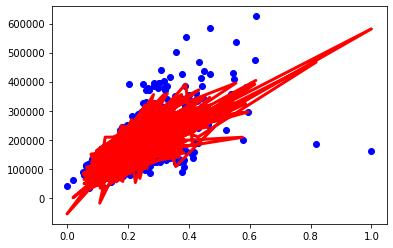

In [84]:
plt.scatter(top_15_numberic_features['GrLivArea'], y_train, color='blue')
plt.plot(top_15_numberic_features['GrLivArea'], y_pred_train, color='red', linewidth=3)
plt.show()

In [52]:
lasso1 = Lasso()
lasso1.fit(top_15_numberic_features, y_train)

ridge1 = Ridge()
ridge1.fit(top_15_numberic_features, y_train)

Ridge()

In [57]:
print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso1.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288178446.4399586
MAE Score Test 22850.430819454796
R2 Score Test 0.777779365448089 

MSE Test 1551752736.1817923
MAE Score Test 24171.953123953674
R2 Score Test 0.7886296125675414 



(1551752736.1817923, 24171.953123953674, 0.7886296125675414)

In [58]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = ridge1.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = ridge1.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1293981732.9386432
MAE Score Test 22851.51493001996
R2 Score Test 0.7767782541410428 

MSE Test 1574138929.539494
MAE Score Test 24091.780275357563
R2 Score Test 0.7855803004878358 



(1574138929.539494, 24091.780275357563, 0.7855803004878358)

In [ ]:
# lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# for i in lambdas:
#   ridgereg=Ridge(aplha=i)
#   ridgereg.fit(X_poly,y)

In [66]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
Ridge = RidgeCV(alphas=arange(0, 1, 0.01),  cv=cv, scoring='neg_mean_absolute_error')

#fit model
Ridge.fit(top_15_numberic_features, y_train)

#display lambda that produced the lowest test MSE
print(Ridge.alpha_)

0.99


In [ ]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
Lasso = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
Lasso.fit(top_15_numberic_features, y_train)

#display lambda that produced the lowest test MSE
print(Lasso.alpha_)


In [68]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = Ridge.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = Ridge.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1293888495.6316018
MAE Score Test 22850.826164748472
R2 Score Test 0.7767943382896263 

MSE Test 1573856383.5419376
MAE Score Test 24091.182077301997
R2 Score Test 0.7856187871974633 



(1573856383.5419376, 24091.182077301997, 0.7856187871974633)

In [69]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = Lasso.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = Lasso.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288178388.3260803
MAE Score Test 22850.429150734806
R2 Score Test 0.7777793754731774 

MSE Test 1551747192.3130205
MAE Score Test 24171.909857135164
R2 Score Test 0.7886303677198687 



(1551747192.3130205, 24171.909857135164, 0.7886303677198687)

In [77]:
alphas = np.array([0.01, 
                    0.001, 
                    0.0001, 
                    0.0002, 
                    0.0003, 
                    0.0004, 
                    0.0005])
 
# Create a parameter grid dictionary with hyperparameter values
paramgrid = {'alpha': alphas}
 
# Instantiate a Lasso regularized model 
model = Lasso()
 
# Instantiate the GridSearchCV method
grid = GridSearchCV(estimator = model, param_grid = paramgrid)
 
# Fit the data into model using GridSearchCV
grid.fit(top_15_numberic_features, y_train)
 
# Get the best score of Lasso regression model and print it
print('\n')
print('*' * 100)
print("The best score of the model using Lasso regresssion and given alpha values is: {0}".format(grid.best_score_))
print('*' * 100)
print('\n')
 
# Get the best score of hyperparameter alpha for Lasso regression and print it
print('*' * 100)
print("The best hyperparameter value for alpha for Lasso regression is: {0}".format(grid.best_estimator_.alpha))
print('*' * 100)
print('\n')



****************************************************************************************************
The best score of the model using Lasso regresssion and given alpha values is: 0.7464972677744942
****************************************************************************************************


****************************************************************************************************
The best hyperparameter value for alpha for Lasso regression is: 0.01
****************************************************************************************************


